In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [2]:
ticker = 'AAPL'  # Change to your desired stock symbol
start_date = '2010-01-01'
end_date = '2021-12-31'

In [3]:
data = yf.download(ticker, start=start_date, end=end_date)




[*********************100%%**********************]  1 of 1 completed


In [4]:
# Preprocess the data
data = data[['Adj Close']]
dataset = data.values.astype(float)

In [5]:
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [6]:
# Split the data into training and testing sets
training_data_len = int(np.ceil(len(dataset) * 0.8))
train_data = scaled_data[0:training_data_len, :

In [7]:
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])

    

In [8]:
x_train, y_train = np.array(x_train), np.array(y_train)


In [9]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [11]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

2356/2356 [==============================] - 106s 42ms/step - loss: 1.3262e-04


In [14]:
 test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [15]:
# Get predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


19/19 [==============================] - 2s 26ms/step


C:\Users\samue\AppData\Local\Temp/ipykernel_20992/2668271907.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


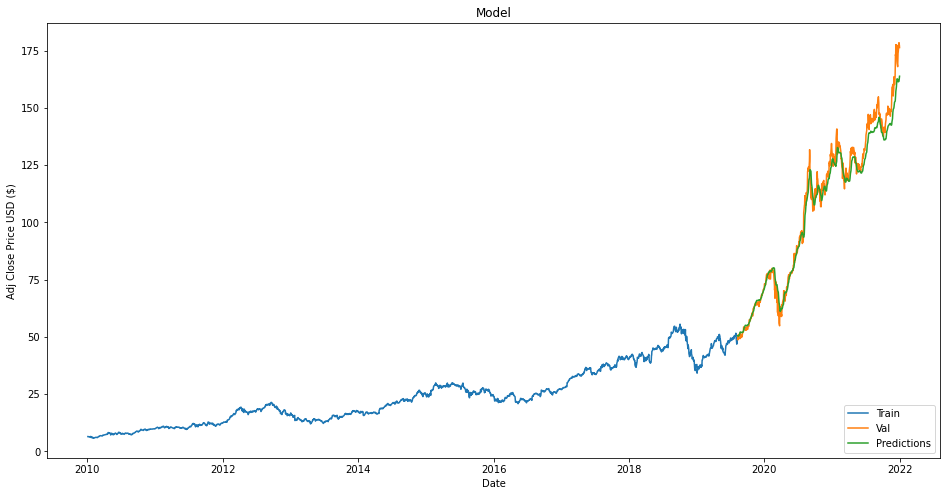

In [17]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Adj Close Price USD ($)')
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()